In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # Для тестовых и тренировачных данных
from sklearn import preprocessing  # Кодировщик

f_name = r'E:\Education\Нетология\DataOps-инженер\Логистическая_регрессия_и_SVM\Лекция_2\adult.csv'
df = pd.read_csv(filepath_or_buffer=f'{f_name}')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
# проверяем нулевые значения
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
# поколоночный метод проверки
print('Для age пустых строк {}'.format( len( df[ pd.isnull( df['age'] ) ] ) ))
print('Для workclass пустых строк {}'.format( len( df[ pd.isnull( df['workclass'] ) ] ) ))
print('Для fnlwgt пустых строк {}'.format( len( df[ pd.isnull( df['fnlwgt'] ) ] ) ))
print('Для education пустых строк {}'.format( len( df[ pd.isnull( df['education'] ) ] ) ))
print('Для educational-num пустых строк {}'.format( len( df[ pd.isnull( df['educational-num'] ) ] ) ))
print('Для marital-status пустых строк {}'.format( len( df[ pd.isnull( df['marital-status'] ) ] ) ))
print('Для occupation пустых строк {}'.format( len( df[ pd.isnull( df['occupation'] ) ] ) ))
print('Для relationship пустых строк {}'.format( len( df[ pd.isnull( df['relationship'] ) ] ) ))
print('Для race пустых строк {}'.format( len( df[ pd.isnull( df['race'] ) ] ) ))
print('Для gender пустых строк {}'.format( len( df[ pd.isnull( df['gender'] ) ] ) ))
print('Для capital-gain пустых строк {}'.format( len( df[ pd.isnull( df['capital-gain'] ) ] ) ))
print('Для capital-loss пустых строк {}'.format( len( df[ pd.isnull( df['capital-loss'] ) ] ) ))
print('Для hours-per-week пустых строк {}'.format( len( df[ pd.isnull( df['hours-per-week'] ) ] ) ))
print('Для native-country пустых строк {}'.format( len( df[ pd.isnull( df['native-country'] ) ] ) ))
print('Для income пустых строк {}'.format( len( data[ pd.isnull( df['income'] ) ] ) ))

Для age пустых строк 0
Для workclass пустых строк 0
Для fnlwgt пустых строк 0
Для education пустых строк 0
Для educational-num пустых строк 0
Для marital-status пустых строк 0
Для occupation пустых строк 0
Для relationship пустых строк 0
Для race пустых строк 0
Для gender пустых строк 0
Для capital-gain пустых строк 0
Для capital-loss пустых строк 0
Для hours-per-week пустых строк 0
Для native-country пустых строк 0
Для income пустых строк 0


In [7]:
model = preprocessing.LabelEncoder()  # Модель кодировщика
model.fit(df['workclass'])
df['workclass'] = model.transform(df['workclass'])

model.fit(df['education'])
df['education'] = model.transform(df['education'])

model.fit(df['marital-status'])
df['marital-status'] = model.transform(df['marital-status'])

model.fit(df['occupation'])
df['occupation'] = model.transform(df['occupation'])

model.fit(df['relationship'])
df['relationship'] = model.transform(df['relationship'])

model.fit(df['race'])
df['race'] = model.transform(df['race'])

model.fit(df['gender'])
df['gender'] = model.transform(df['gender'])

model.fit(df['native-country'])
df['native-country'] = model.transform(df['native-country'])

model.fit(df['income'])
df['income'] = model.transform(df['income'])  # 0 это <=50K, а 1 это >50K

df.dtypes

age                int64
workclass          int32
fnlwgt             int64
education          int32
educational-num    int64
marital-status     int32
occupation         int32
relationship       int32
race               int32
gender             int32
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int32
income             int32
dtype: object

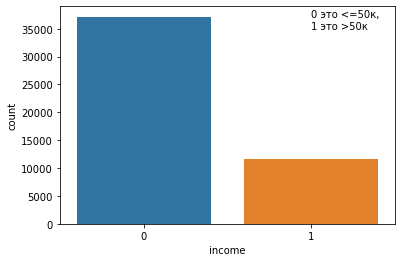

In [9]:
sns.countplot(x='income', data=df)
plt.text(1,35000,"""0 это <=50к,
1 это >50к """)
plt.show()

In [16]:
X = df[['age','education', 'workclass','marital-status','occupation', 'relationship', 'gender', 'native-country']].values
y = df['income'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = LogisticRegression(max_iter=100)
clf = make_pipeline(StandardScaler(), SVC(gamma="auto"))
model.fit(X_train,y_train)
clf.fit(X_train, y_train)
answers_pred = model.predict(X_test)

print("For TestLogistic: ", accuracy_score(y_test,answers_pred))
print("For TestSVM: ", clf.score(X_test, y_test))
print("For TrainLogistic: ", model.score(X_train, y_train))
print("For TrainSVM", clf.score(X_train, y_train))

For TestLogistic:  0.7508445081379875
For TestSVM:  0.8029481011362473
For TrainLogistic:  0.753307910833568
For TrainSVM 0.8032400890640595


In [19]:
pred_2 = clf.predict(X_test)
pred_1 = model.predict(X_test)

print("Наше предсказание Logistic")
for x, i in enumerate(df['income']):
    if pred_1[x] != i or pred_2[x] != i:
        print(f'Истина: {i}\t|\tLogistic: {pred_1[x]}\t:\tSVM: {pred_2[x]}')

Наше предсказание Logistic
Истина: 0	|	Logistic: 0	:	SVM: 1
Истина: 1	|	Logistic: 0	:	SVM: 0
Истина: 1	|	Logistic: 0	:	SVM: 0
Истина: 1	|	Logistic: 0	:	SVM: 0
Истина: 1	|	Logistic: 0	:	SVM: 1
Истина: 0	|	Logistic: 0	:	SVM: 1
Истина: 1	|	Logistic: 0	:	SVM: 0
Истина: 1	|	Logistic: 0	:	SVM: 1
Истина: 1	|	Logistic: 0	:	SVM: 0
Истина: 1	|	Logistic: 0	:	SVM: 0
Истина: 0	|	Logistic: 0	:	SVM: 1
Истина: 1	|	Logistic: 0	:	SVM: 0
Истина: 0	|	Logistic: 1	:	SVM: 0
Истина: 1	|	Logistic: 0	:	SVM: 0
Истина: 1	|	Logistic: 0	:	SVM: 1
Истина: 1	|	Logistic: 0	:	SVM: 0
Истина: 0	|	Logistic: 0	:	SVM: 1
Истина: 1	|	Logistic: 0	:	SVM: 0
Истина: 0	|	Logistic: 0	:	SVM: 1
Истина: 0	|	Logistic: 1	:	SVM: 1
Истина: 0	|	Logistic: 0	:	SVM: 1
Истина: 1	|	Logistic: 0	:	SVM: 0
Истина: 0	|	Logistic: 0	:	SVM: 1
Истина: 1	|	Logistic: 0	:	SVM: 0
Истина: 1	|	Logistic: 0	:	SVM: 0
Истина: 0	|	Logistic: 1	:	SVM: 1
Истина: 0	|	Logistic: 0	:	SVM: 1
Истина: 0	|	Logistic: 0	:	SVM: 1
Истина: 1	|	Logistic: 0	:	SVM: 0
Истина: 0	|	Logi

IndexError: index 9769 is out of bounds for axis 0 with size 9769